# Importing necessary libraries

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Defining bullet parameters and initial conditions

In [70]:
m = 0.004  # bullet mass in kilograms
d = 0.00556  # bullet diameter in meters
A = np.pi * (d / 2) ** 2  # cross-sectional area (frontal surface)
Cd = 0.295  # drag coefficient
rho0 = 1.225  # air density at sea level (kg/m^3)
H = 8500  # atmospheric scale height in meters
g = 9.81  # gravitational acceleration (m/s^2)
v0 = 890  # initial velocity in m/s (for Grot rifle)
h0 = 2 # initial height (m), muzzle height of a Grot rifle held vertically by a human

Necessary functions: Air density as a function of altitude and system of differential equations

In [30]:
def rho(h):
    return rho0 * np.exp(-h / H)

def vertical_motion_with_variable_drag(t, y):
    v, h = y
    if h < 0:
        return [0, 0]
    air_density = rho(h)
    drag_force = 0.5 * air_density * Cd * A * v**2 * np.sign(v)
    dvdt = -g - drag_force / m
    dhdt = v
    return [dvdt, dhdt]


Solving the equations

In [73]:
y0 = [v0, h0]
t_span = (0, 44.5)
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol_up = solve_ivp(vertical_motion_with_variable_drag, t_span, y0, t_eval=t_eval, rtol=1e-8)

# Stoping when hitting the ground (h=0)
ground_idx = np.where(sol_up.y[1] <= 0)[0]
if len(ground_idx) > 0:
    last_index = ground_idx[0]
else:
    last_index = -1

# Key results: maximum height, ascent time, final speed and energy when hitting the ground
max_height = max(sol_up.y[1])
ascent_time = sol_up.t[np.argmax(sol_up.y[1])]
final_speed = sol_up.y[0][last_index]
final_energy = 0.5*m*abs(round(sol_up.y[0][last_index]))**2

Plotting the graph

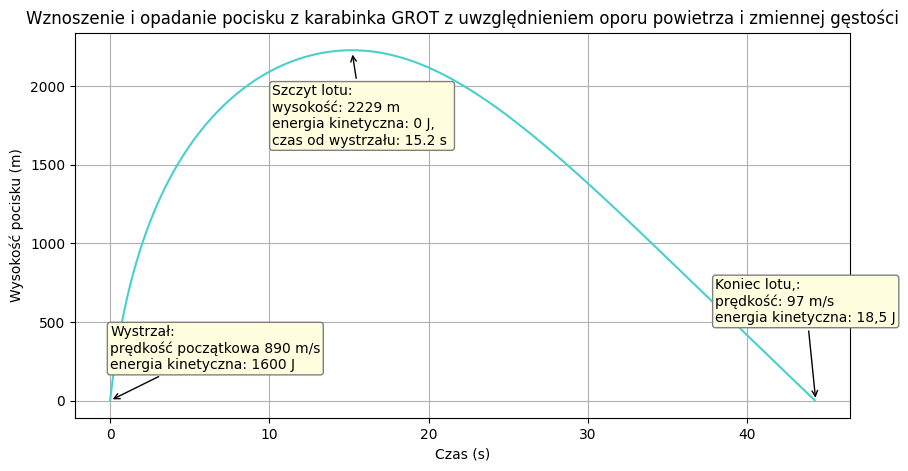

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(sol_up.t[:last_index], sol_up.y[1][:last_index],color='mediumturquoise')
plt.xlabel("Czas (s)")
plt.ylabel("Wysokość pocisku (m)")
plt.title("Wznoszenie i opadanie pocisku z karabinka GROT z uwzględnieniem oporu powietrza i zmiennej gęstości", fontsize=12)
plt.grid(True)

# Legend
plt.annotate('Wystrzał:\nprędkość początkowa 890 m/s\nenergia kinetyczna: 1600 J',
             xy=(0, 0),
             xytext=(0,200),
             arrowprops=dict(arrowstyle='->', color='black'),
             bbox=dict(boxstyle='round,pad=0.2', fc='lightyellow', ec='gray', lw=1),
             fontsize=10)

plt.annotate(f'Szczyt lotu:\nwysokość: {round(max_height)} m\nenergia kinetyczna: 0 J, \nczas od wystrzału: {round(ascent_time,1)} s ',
             xy=(ascent_time, max_height-10),
             xytext=(ascent_time -5, max_height - 600),
             arrowprops=dict(arrowstyle='->', color='black'),
             bbox=dict(boxstyle='round,pad=0.2', fc='lightyellow', ec='gray', lw=1),
             fontsize=10)

plt.annotate(f'Koniec lotu,:\nprędkość: {abs(round(sol_up.y[0][last_index]))} m/s\nenergia kinetyczna: 18,5 J',
             xy=(44.3, 0),
             xytext=(38 + 0, 500),
             arrowprops=dict(arrowstyle='->', color='black'),
             bbox=dict(boxstyle='round,pad=0.2', fc='lightyellow', ec='gray', lw=1),
             fontsize=10)

plt.show()